# Biostat 257 Homework 1

#### Due Apr 17 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2020-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

**Solution:** The repository has been created and the invitation for collaboration sent.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

    **Solution:**  flase is returned. The left-hand-side result is 1.2 while the right-hand-side has more decimal digits which makes the answer wrong actually. This is probaboly because most decimals have infinite representations in binary and turncated in programming language. When the '0.1+ 0.1' is calculated first, since 0.2 is exactly twice 0.1 (although they are not respectively 2/10 and 1/10), and that adding 0.1 to itself produces the value that is also the one you get when you type the constant 0.2.

In [4]:
x, y, z = 0.1, 0.1, 1.0
print((x+y) + z)
print('\n')
print(x +(y+z))
(x+y) + z == x +(y+z)

1.2
1.2000000000000002

false

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

    **Solution:** No, not all of them do. For the same reason, this can return false.

In [5]:
x, y, z = 0.1, 0.1, 0.3
print((x*y) * z)
print('\n')
print(x * (y*z))
(x * y) * z == x * (y * z)

0.0030000000000000005
0.003

false

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

    **Solution:** No, not all of them do. For the same reason, this can return false.

In [6]:
x, y, a = 0.1, 0.2, 0.3
print(a * (x + y))
print('\n')
print(a * x + a * y)
a * (x + y) == a * x + a * y

0.09000000000000001
0.09

false

4. Is `0 * x == 0` true for all floating-point number `x`? 

    **Solution:** Yes, since the answer of left-hand-side is always 0, which has the value as the one on the right-hand-side of the equation, no matter how it is represented in binary

5. Is `x / a == x * (1 / a)` always true?

    **Solution:** Yes

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input. 

    **Solution:** 

In [7]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(2)


;  @ In[7]:2 within `g'
; Function Attrs: uwtable
define i64 @julia_g_17783(i64) #0 {
top:
;  @ In[7]:3 within `g'
; ┌ @ int.jl:54 within `*'
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:52 within `-'
   %2 = add i64 %1, -2441406
; └
;  @ In[7]:5 within `g'
  ret i64 %2
}


 2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  

In [8]:
@code_llvm g(2.0)


;  @ In[7]:2 within `g'
; Function Attrs: uwtable
define double @julia_g_17784(double) #0 {
top:
;  @ In[7]:3 within `g'
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %10 = fadd d

3. Compare the bitcode from questions 1 and 2. What do you find?  

    **Solution:** Julia is compiling the function differently based on the input type. For the `Int64` input, the LLVM bitcode is way simpler than what used for `Float46` input, which can make the program more efficient.

4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

**Solution:** According to the documentation, `fastmath` execute a transformed version of the expression and it allows floating point optimizations that are correct for real numbers, but lead to differences for IEEE numbers. The bitcode for `Int64` input is same as the original function `g` and the bitcode for floating point number is optimized and way shorter than the original one.

In [9]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
@code_llvm g_fastmath(2)


;  @ In[9]:2 within `g_fastmath'
; Function Attrs: uwtable
define i64 @julia_g_fastmath_17785(i64) #0 {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:266 within `mul_fast'
; │┌ @ int.jl:54 within `*'
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:266 within `sub_fast'
; │┌ @ int.jl:52 within `-'
    %2 = add i64 %1, -2441406
; └└
;  @ In[9]:5 within `g_fastmath'
  ret i64 %2
}


In [10]:
@code_llvm g_fastmath(2.0)


;  @ In[9]:2 within `g_fastmath'
; Function Attrs: uwtable
define double @julia_g_fastmath_17786(double) #0 {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:263 within `mul_fast' @ fastmath.jl:163
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:263 within `sub_fast' @ fastmath.jl:162
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[9]:5 within `g_fastmath'
  ret double %2
}


## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`. 

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

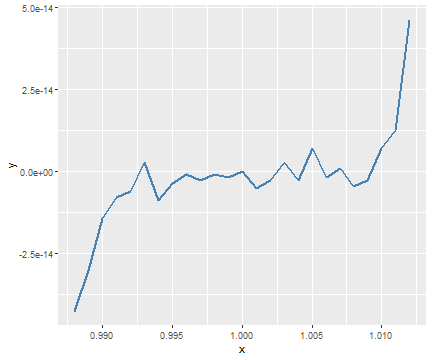

RObject{VecSxp}


In [50]:
x = 0.988:0.001:1.012
y = x.^7 -7*x.^6 + 21*x.^5 - 35*x.^4 + 35*x.^3 - 21*x.^2  + 7 .*x .-1

using RCall
R"""
data <- data.frame(x=$x,y=$y)
library(ggplot2)
library(dplyr)
ggplot(data, aes(x = x, y = y)) + 
    geom_line(color='steelblue', size=1)
"""

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

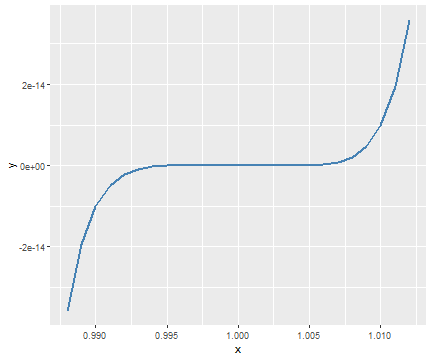

RObject{VecSxp}


In [51]:
x = 0.988:0.001:1.012
y = (x .-1).^7 

using RCall
R"""
data <- data.frame(x=$x,y=$y)
library(ggplot2)
library(dplyr)
ggplot(data, aes(x = x, y = y)) + 
    geom_line(color='steelblue', size=1)
"""

3. Explain what you found.

    **Solution:** Instability can be found on the previous plot and the line in the second plot is more smooth

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

**Solution:**
\begin{equation}
\begin{split}
LHS^{-1}\times RHS &= (A + uu^T)(A^{-1} - \frac{1}{1+u^TA^{-1}u}A^{-1}uu^TA^{-1})\\
& = AA^{-1} + uu^TA^{-1} - \frac{AA^{-1}uu^TA^{-1}+ uu^TA^{-1}uu^TA^{-1}}{1+u^TA^{-1}u}\\
& = I + uu^TA^{-1} - \frac{uu^TA^{-1}+ uu^TA^{-1}uu^TA^{-1}}{1+u^TA^{-1}u}\\
& = I + uu^TA^{-1} - \frac{u(1+ u^TA^{-1}u)u^TA^{-1}}{1+u^TA^{-1}u}\\
& = I + uu^TA^{-1} - uu^TA^{-1}\\
& = I
\end{split}
\end{equation}

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solutions:** Similarly,
\begin{equation}
\begin{split}
LHS^{-1}\times RHS &= (A + UV^T)\left[A^{-1} - A^{-1}U(I_m+V^TA^{-1}U)^{-1}V^TA^{-1}\right]\\
& = AA^{-1} + UV^TA^{-1} - AA^{-1}U(I_m+V^TA^{-1}U)^{-1}V^TA^{-1} - UV^TA^{-1}U(I_m+V^TA^{-1}U)^{-1}V^TA^{-1}\\
& = I + UV^TA^{-1} - U(I_m + V^TA^{-1}U)(I_m+V^TA^{-1}U)^{-1}V^TA^{-1}\\
& = I + UV^TA^{-1} - UV^TA^{-1}\\
& = I
\end{split}
\end{equation}

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

**Solutions:** Similarly,
\begin{equation}
\begin{split}
LHS^{-1}\times RHS &= (A + UBV^T)\left[A^{-1} - A^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}V^TA^{-1}\right]\\
& = AA^{-1} + UBV^TA^{-1} - AA^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}V^TA^{-1} - UBV^TA^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}V^TA^{-1}\\
& = I + UBV^TA^{-1} - UB(B^{-1} + V^TA^{-1}U)(B^{-1}+V^TA^{-1}U)^{-1}V^TA^{-1}\\
& = I + UBV^TA^{-1} - UBV^TA^{-1}\\
& = I
\end{split}
\end{equation}

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

In [31]:
A = [2 1; 0 1]

In [32]:
B = [2 3; 0 5]

2×2 Array{Int64,2}:
 2  3
 0  5

In [33]:
C = A*B

2×2 Array{Int64,2}:
 4  11
 0   5

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

In [37]:
inv(A)

2×2 Array{Float64,2}:
 0.5  -0.5
 0.0   1.0

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

In [40]:
A = [1 2; 0 1]
B = [1 3; 0 1]

2×2 Array{Int64,2}:
 1  3
 0  1

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

In [41]:
inv(A)

2×2 Array{Float64,2}:
 1.0  -2.0
 0.0   1.0

5. An orthogonal upper (lower) triangular matrix is diagonal.

**Solutions:** 

Assume we have: \begin{equation}
A = \begin{pmatrix} a & b \\ 0 & c
\end{pmatrix}
\end{equation}

We know:\begin{equation}
AA^T = \begin{pmatrix} a^2+b^2 & bc \\ bc & c^2
\end{pmatrix}
\end{equation}
If A is upper triangular and also orthogonal,  $\mathrm{bc = 0, c^2 \ne 0}$ and thus $\mathrm{b =0}$

Similar for the lower triangular matrix case, so an orhtogonal upper(lower) triangular matrix is diagonal